Uma analise visual do trafego na rede Tor após a invasão russa à Ucrânia.
Todos os dados foram extraídos de https://metrics.torproject.org

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:

# Importacao dos CSVs
def relayImport(x):
    return pd.read_csv('https://metrics.torproject.org/userstats-relay-country.csv?country=' + str(x), comment='#', parse_dates=['date'], index_col=['date'])

def bridgeImport(x):
    return pd.read_csv('https://metrics.torproject.org/userstats-bridge-country.csv?country=' + str(x), comment='#', parse_dates=['date'], index_col=['date'])

relayRu, bridgeRu = relayImport('ru'), bridgeImport('ru')
relayUa, bridgeUa = relayImport('ua'), bridgeImport('ua')

In [37]:
# Funcao para agilizar a plotagem
def viz(axes, a, b, color, xlabel, ylabel):
    axes.plot(a, b, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', color=color)

def porcentagem(a, b):
    return 'Crescimento de: ' + str(a / b * 100) + '%.'

def plotAnnotate(axes, tag, x, y, xtext, ytext, style, color):
    axes.annotate(tag, xy=(x, y), xytext=(xtext, ytext), arrowprops={'arrowstyle': style, 'color': color})

def snsviz(axes, df, a, b, xlabel, ylabel, title):
    sns.lineplot(ax=axes, data=df, x=a, y=b)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)


In [22]:
relayUa.info

<bound method DataFrame.info of            country  users    lower    upper  frac
date                                             
2011-03-06      ua   9491      NaN      NaN    11
2011-09-01      ua   8200      NaN      NaN    10
2011-09-02      ua   8232      NaN      NaN    10
2011-09-04      ua   6830      NaN      NaN    12
2011-09-05      ua   7798      NaN      NaN    12
...            ...    ...      ...      ...   ...
2022-03-25      ua  45179  36574.0  61605.0    94
2022-03-26      ua  42359  34511.0  59663.0    93
2022-03-27      ua  42513  33321.0  59761.0    93
2022-03-28      ua  42851  35243.0  62323.0    92
2022-03-29      ua  42492  36051.0  63030.0    91

[3857 rows x 5 columns]>

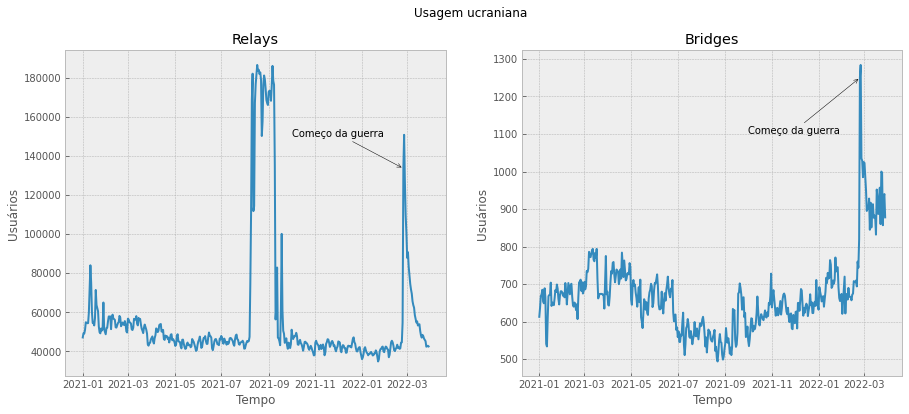

In [50]:
start = '2021-01-01'
relayUa_ytd, bridgeUa_ytd = relayUa[start:], bridgeUa[start:]

# Plot of Ukrainian stats
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 6))
fig.suptitle('Usagem ucraniana')
#plt.style.use('bmh')
#plt.title('Usagem ucraniana da rede Tor')

snsviz(ax[0], relayUa_ytd, 'date', 'users', 'Tempo', 'Usuários', 'Relays')
plotAnnotate(ax[0], 'Começo da guerra', pd.Timestamp('2022-02-24'), relayUa['users'].loc['2022-02-24'], pd.Timestamp('2021-10-01'), 150000, \
    '->', 'black')

snsviz(ax[1], bridgeUa_ytd, 'date', 'users', 'Tempo', 'Usuários', 'Bridges')
plotAnnotate(ax[1], 'Começo da guerra', pd.Timestamp('2022-02-24'), bridgeUa['users'].loc['2022-02-24'], pd.Timestamp('2021-10-01'), 1100, \
    '->', 'black')

plt.savefig('usagemUcrania.png')

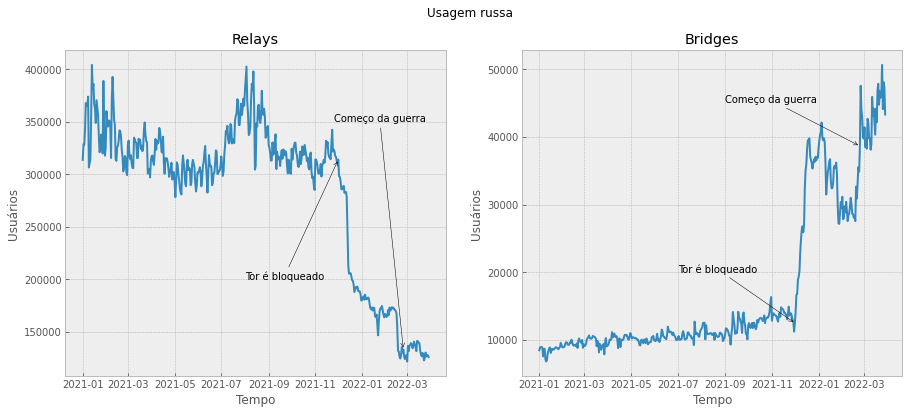

In [49]:
relayRu_ytd, bridgeRu_ytd = relayRu[start:], bridgeRu[start:]

# Plot of Russian stats
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True)
fig.suptitle('Usagem russa')

# First plot
snsviz(ax[0], relayRu_ytd, 'date', 'users', 'Tempo', 'Usuários', 'Relays')
plotAnnotate(ax[0], 'Tor é bloqueado', pd.Timestamp('2021-12-01'), relayRu['users'].loc['2021-12-01'], \
    pd.Timestamp('2021-08-01'), 200000, '->', 'black')
plotAnnotate(ax[0], 'Começo da guerra', pd.Timestamp('2022-02-24'), relayRu['users'].loc['2022-02-24'], \
    pd.Timestamp('2021-11-25'), 350000, '->', 'black')

# Second plot
snsviz(ax[1], bridgeRu_ytd, 'date', 'users', 'Tempo', 'Usuários', 'Bridges')
plotAnnotate(ax[1], 'Tor é bloqueado', pd.Timestamp('2021-12-01'), bridgeRu['users'].loc['2021-12-01'], \
    pd.Timestamp('2021-07-01'), 20000, '->', 'black')
plotAnnotate(ax[1], 'Começo da guerra', pd.Timestamp('2022-02-24'), bridgeRu['users'].loc['2022-02-24'], \
    pd.Timestamp('2021-09-01'), 45000, '->', 'black')

porcentagem(bridgeRu['users'].loc['2022-02-24'], bridgeRu['users'].loc['2022-02-23'])

plt.savefig('russian_usage.png', bbox_inches='tight')
